In [93]:
#import requisite packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_wine
from sklearn.pipeline import Pipeline

# Applying PCA on IRIS dataset

In [8]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
iris['feature_names'], iris['target_names']

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [16]:
X, y= iris['data'], iris['target']

In [20]:
X.shape, y.shape

((150, 4), (150,))

In [113]:
pipe = Pipeline([('scalar', StandardScaler()),('pca', PCA(n_components=2))])

In [114]:
pipe.fit(X)

Pipeline(steps=[('scalar', StandardScaler()), ('pca', PCA(n_components=2))])

In [115]:
type(pipe)

sklearn.pipeline.Pipeline

In [116]:
pipe[1].components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [117]:
pipe[1].explained_variance_

array([2.93808505, 0.9201649 ])

In [118]:
X_transformed = pipe.transform(X)
X_transformed.shape

(150, 2)

In [119]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
y = y.reshape(-1,1)
X_train,X_test, y_train, y_test = train_test_split(X_transformed,y, test_size=0.25, random_state= 1947)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8947368421052632

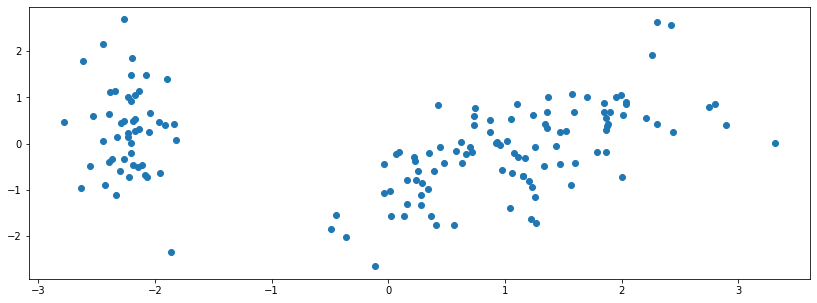

In [126]:
plt.figure(figsize=(14,5))
plt.scatter(X_transformed[:,0], X_transformed[:,1])

# Applying PCA on wine dataset

In [128]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [132]:
wine['feature_names'], wine['target_names']

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [155]:
X, y= wine['data'], wine['target']
X.shape, y.shape
data_df = pd.DataFrame(X)
data_df.columns = wine.feature_names
data_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<AxesSubplot:>

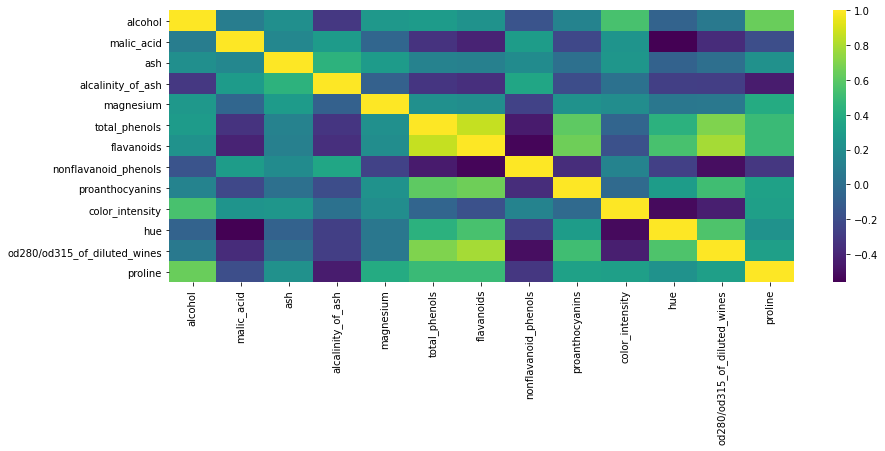

In [152]:
import seaborn as sns
plt.figure(figsize =(14,5))
sns.heatmap(data_df.corr(), cmap= 'viridis')

# Applying classifier without  principal components

In [160]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state= 1947)
pipel = Pipeline([('scaler', StandardScaler()),('clf',LinearSVC())])
pipel.fit(X_train, y_train)
y_pred = pipel.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

# Applying classifier with  principal components


In [176]:
for i in range(1,6):
    pipe2 = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=i)), ('clf1',LinearSVC())])
    pipe2.fit(X_train,y_train)
    y_pred1 = pipe2.predict(X_test)
    print(accuracy_score(y_test,y_pred1))

0.8222222222222222
0.9777777777777777
0.9333333333333333
0.9333333333333333
1.0
